In [1]:
from bs4 import BeautifulSoup as bs
import requests
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.by import By
from selenium import webdriver
import pandas as pd
#import httpx

options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
#options.add_argument('--incognito')
#options.add_argument('--headless')
options.add_argument('--disable-javascript')

driver = webdriver.Chrome(executable_path=r"Users/Matt/Desktop/School/DataSci/Hw1",options=options)

C:\Users\Matt\AppData\Local\Temp\ipykernel_2068\1784225607.py:17: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r"Users/Matt/Desktop/School/DataSci/Hw1",options=options)


In [2]:
df = pd.DataFrame({'title': pd.Series(dtype='str'),
                   'release_date': pd.Series(dtype='str'),
                   'rating': pd.Series(dtype='str'),
                   'critic_score': pd.Series(dtype='str'),
                   'audience_score': pd.Series(dtype='str'),
             
})

print(df)

#specifies the website to scrape and use selenium
driver.get("https://www.metacritic.com/browse/movies/score/metascore/all/filtered?sort=desc")

WebDriverWait(driver, 1).until(
    lambda s: s.find_element(By.CLASS_NAME,"clamp-list").is_displayed()
)

i = 0
while True:
    try:
        # waits until the head-block class is displayed
        WebDriverWait(driver, 1).until(
            lambda s: s.find_element(By.CLASS_NAME,'clamp-list').is_displayed()
        )
    except TimeoutException:
        break

    url = driver.current_url
    session = requests.Session()
    session.max_redirects = 200
    response = session.get(url,headers={'User-Agent': 'Google Chrome'})
    #response = requests.get(url)
    #print(response.history)
    html = response.content
    #creates of beautiful soup object of the current url
    soup = bs(html, "lxml")
    #print(soup)
    
    #time.sleep(1)
    #makes a list of each div with a class of "item-info"
    all_item_info = soup.find_all("td", class_="clamp-summary-wrap")
    #for each item in the list, gather all the relevant data about the books
    for item_info in all_item_info:
        try:
            movie_title = item_info.find("a", class_="title").find("h3").get_text(strip=True)
        except:
            movie_title = pd.NA
        try:
            movie_release = item_info.find("div", class_="clamp-details").find_all("span")[-2].get_text(strip=True)
        except:
            movie_release = pd.NA
        try:
            movie_rating = item_info.find("div", class_="clamp-details").find_all("span")[-1].get_text(strip=True)
        except:
            movie_rating = pd.NA
        try:
            movie_crit_score = item_info.find("a", class_="metascore_anchor").find("div").get_text(strip=True)
        except:
            movie_crit_score = pd.NA
        try:
            movie_user_score = item_info.find("div", class_="browse-score-clamp").find("div", class_="clamp-userscore").find("a").find("div").get_text(strip=True)
        except:
            movie_user_score = pd.NA
            
        df = pd.concat([df,pd.Series({'title': movie_title,
                       'release_date': movie_release,
                       'rating': movie_rating,
                       'critic_score': movie_crit_score,
                       'audience_score': movie_user_score
                      }).to_frame().T], ignore_index=True)
    
    
    try:
        load_more = driver.find_element(By.XPATH,'//a[@rel="next"]')
        if load_more: driver.execute_script("arguments[0].click();", load_more)
    except: pass
        #break
    #after each page it increments i by 1, once i is greater than 33 we have reached
    #the last page so it breaks out of the while statement
    i += 1
    if i > 154:
        break
        
        
df.to_csv('metacritic_data.csv')
df  

Empty DataFrame
Columns: [title, release_date, rating, critic_score, audience_score]
Index: []


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=112.0.5615.138)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x002ADCE3+50899]
	(No symbol) [0x0023E111]
	(No symbol) [0x00145588]
	(No symbol) [0x0012D333]
	(No symbol) [0x0018F4DB]
	(No symbol) [0x0019DB33]
	(No symbol) [0x0018B6F6]
	(No symbol) [0x00167708]
	(No symbol) [0x0016886D]
	GetHandleVerifier [0x00513EAE+2566302]
	GetHandleVerifier [0x005492B1+2784417]
	GetHandleVerifier [0x0054327C+2759788]
	GetHandleVerifier [0x00345740+672048]
	(No symbol) [0x00248872]
	(No symbol) [0x002441C8]
	(No symbol) [0x002442AB]
	(No symbol) [0x002371B7]
	BaseThreadInitThunk [0x766B0099+25]
	RtlGetAppContainerNamedObjectPath [0x77497B6E+286]
	RtlGetAppContainerNamedObjectPath [0x77497B3E+238]
	(No symbol) [0x00000000]


In [ ]:
df2 = pd.read_csv("metacritic_data.csv",index_col=0)
#df2
df2_no_NaN = df2.dropna()
df2_no_NaN

,title,release_date,rating,critic_score,audience_score
0,Tokyo Story,"March 13, 1972",| Not Rated,100,8.7
1,The Godfather,"March 24, 1972",| R,100,9.2
2,Citizen Kane,"September 4, 1941",| Approved,100,8.4
3,Rear Window,"September 1, 1954",| TV-G,100,8.7
4,Casablanca,"January 23, 1943",| TV-PG,100,8.8
...,...,...,...,...,...
15438,The Garbage Pail Kids Movie,"August 22, 1987",| PG,1,0.7
15439,United Passions,"June 5, 2015",| Not Rated,1,0.7
15440,Bio-Dome,"January 12, 1996",| PG-13,1,7.5
15441,Chaos,"August 12, 2005",| Not Rated,1,2.5


In [ ]:
df2_no_NaN['release_year'] = df2_no_NaN['release_date'].str[-4:]
#df2_no_NaN['audience_score'] = pd.to_numeric(df2_no_NaN['audience_score'],errors='coerce').notnull()
df2_no_NaN['audience_score'] = pd.to_numeric(df2_no_NaN['audience_score'], errors='coerce')
df2_no_NaN['release_year'] = pd.to_numeric(df2_no_NaN['release_year'], errors='coerce')
df2_no_NaN.to_csv("meta_no_nan.csv")

C:\Users\Chloe\AppData\Local\Temp\ipykernel_24744\1018664600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_no_NaN['release_year'] = df2_no_NaN['release_date'].str[-4:]
C:\Users\Chloe\AppData\Local\Temp\ipykernel_24744\1018664600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_no_NaN['audience_score'] = pd.to_numeric(df2_no_NaN['audience_score'], errors='coerce')
C:\Users\Chloe\AppData\Local\Temp\ipykernel_24744\1018664600.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy

,title,release_date,rating,critic_score,audience_score,release_year
0,Tokyo Story,"March 13, 1972",| Not Rated,100,8.7,1972.0
1,The Godfather,"March 24, 1972",| R,100,9.2,1972.0
2,Citizen Kane,"September 4, 1941",| Approved,100,8.4,1941.0
3,Rear Window,"September 1, 1954",| TV-G,100,8.7,1954.0
4,Casablanca,"January 23, 1943",| TV-PG,100,8.8,1943.0
...,...,...,...,...,...,...
15438,The Garbage Pail Kids Movie,"August 22, 1987",| PG,1,0.7,1987.0
15439,United Passions,"June 5, 2015",| Not Rated,1,0.7,2015.0
15440,Bio-Dome,"January 12, 1996",| PG-13,1,7.5,1996.0
15441,Chaos,"August 12, 2005",| Not Rated,1,2.5,2005.0


In [ ]:
print(df2_no_NaN.dtypes)

title              object
release_date       object
rating             object
critic_score        int64
audience_score    float64
release_year      float64
dtype: object


<AxesSubplot:title={'center':'movie release year vs. critic score of movies'}, xlabel='release_year', ylabel='critic_score'>

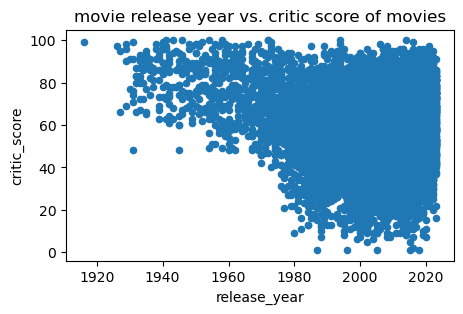

In [ ]:
df2_no_NaN.plot(x='release_year', y='critic_score', kind='scatter', figsize=(5,3),
        title='movie release year vs. critic score of movies')

<AxesSubplot:title={'center':'audience score of movies vs. critic score of movies'}, xlabel='audience_score', ylabel='critic_score'>

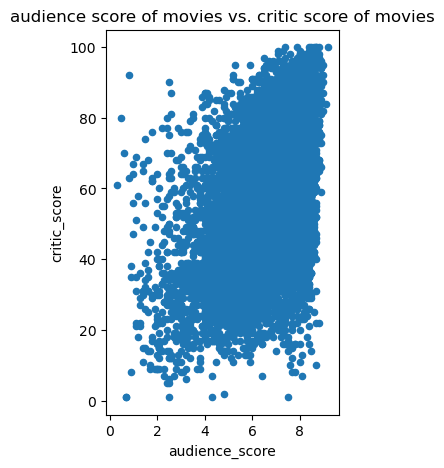

In [ ]:
df2_no_NaN.plot(x='audience_score', y='critic_score', kind='scatter', figsize=(3,5),
        title='audience score of movies vs. critic score of movies')

In [ ]:
df.to_csv("metacritic_data_C")